In [7]:
%time

"""
niezłe dopasowania już dla lr = 0.5 i 100 iteracji
lepsze plateau lr = 0.01 1500
"""

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

nPoints = 100
epsilon = 0.5 
a = 10
f1 = (-5, 0)
f2 = (5, 0)
f_stack = np.stack([f1, f2])


def get_analytic():
    "znajdz rozwiazanie analityczne, rownanie parametryczne elipsy"
    global a, f1, f2
    center = np.mean([f1, f2], axis=0)
    c = np.linalg.norm(np.array(f1) - center)
    b = np.sqrt(a**2 - c**2)
    t = np.linspace(0, 2 * np.pi, 100)
    x = a * np.cos(t) + center[0]
    y = b * np.sin(t) + center[1]
    return x, y

def loss_function(points, f_stack):
    "zwektoryzowana funkcja straty, znajdz odleglosc punktow od ognisk"
    d = tf.norm(f_stack - tf.expand_dims(points, axis=1), axis=2)
    d_sum = tf.reduce_sum(d, axis=1)
    return tf.abs(d_sum - 2 * a)

"inicjalizacja punktow jako wektor"
weights = tf.Variable(((np.random.default_rng().random((nPoints, 2)) - 0.5) * 20))
p_history = np.array(weights.numpy()[0, :]).reshape(1, 2) #trajektoria punktu zero
loss_history = []
nIterations = 100
lr = 0.1
"gradient"
for iter in range(nIterations):
    with tf.GradientTape() as tape:
        loss = loss_function(weights, f_stack)
        p_history = np.concatenate((p_history, weights.numpy()[0, :].reshape(1, 2)), axis = 0)
    gradients = tape.gradient(loss, weights)
    loss_history.append(loss)
    weights.assign_sub(lr * gradients)

points = weights.numpy()
p_history = p_history[:-1, :]
loss_history = np.array(loss_history)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs


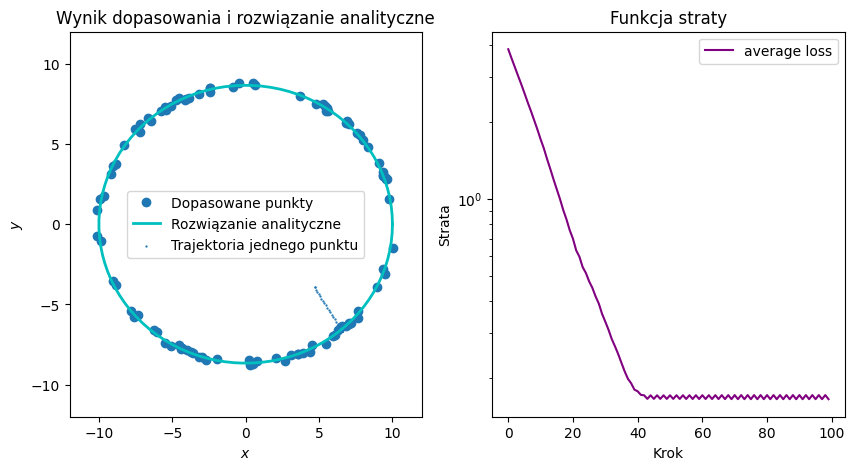

In [21]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))
axes[0].plot(*points.T, 'o', label='Dopasowane punkty')
axes[0].plot(*get_analytic(), 'c-', linewidth=2, label='Rozwiązanie analityczne')
axes[0].scatter(*p_history.T, s = 0.4, label='Trajektoria jednego punktu')
axes[0].legend()
axes[0].set_xlabel(r'$x$')
axes[0].set_ylabel(r'$y$')
axes[0].set_ylim((-12, 12))
axes[0].set_xlim((-12, 12))
axes[0].set_title('Wynik dopasowania i rozwiązanie analityczne')
axes[1].plot(np.arange(len(loss_history)), np.mean(loss_history, axis = 1), color = 'purple', label = "average loss")
axes[1].set_yscale('log')
axes[1].set_title('Funkcja straty')
axes[1].set_xlabel('Krok')
axes[1].set_ylabel('Strata')
axes[1].legend()
fig.show()